### Suppose that I fit a logistic regression model using historical data collected from students
$$\ln\left(\frac{p}{1-p}\right) = -3 + 0.8 \times \text{Hours_Studied} + 1.5 \times \text{Review_Session}$$


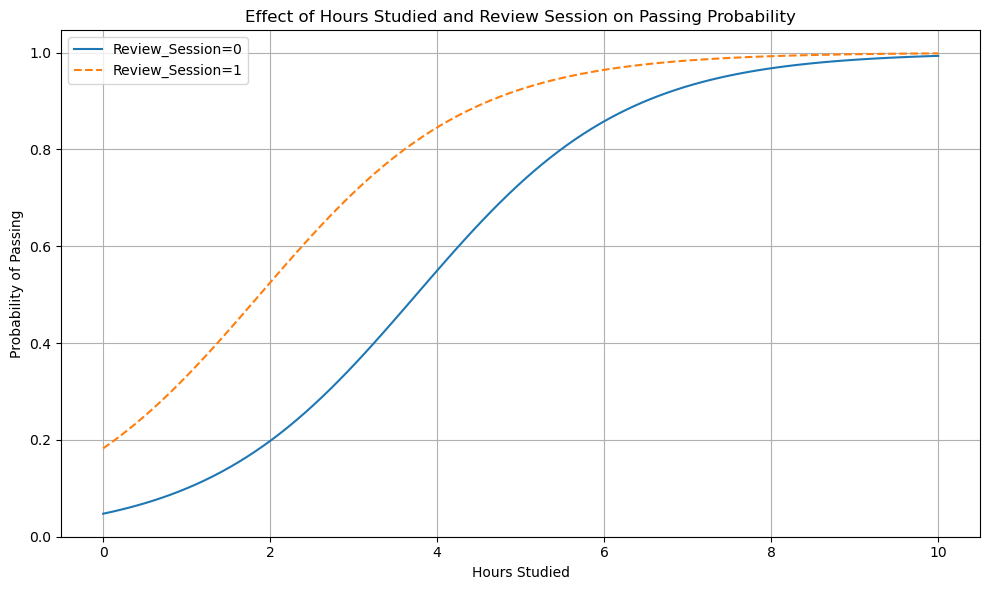

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)

log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:

# Plug in specific values
hours_studied = 3
review_session = 1

log_odds_value = log_odds(hours_studied, review_session)
probability_value = logistic_function(log_odds_value)

print(f'For {hours_studied} hours studied and a review session of {review_session}, the probability of passing is approximately {probability_value:.2f}.')
print('log odds is', log_odds_value)

For 3 hours studied and a review session of 1, the probability of passing is approximately 0.71.
log odds is 0.9000000000000004


In [15]:
odds_value = np.exp(log_odds_value)

print(f"The odds value is {odds_value:.2f}")

The odds value is 12.18


In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read data from CSV
data = pd.read_csv('student_data.csv')  # Replace 'your_data.csv' with your actual CSV file

# Prepare the data for training
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Train the logistic regression model on the entire dataset
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

# Make predictions on the training data itself
y_pred_train = log_reg_model.predict(X)

# Calculate the training error
training_error = 1 - accuracy_score(y, y_pred_train)

print(f"The training error of the logistic regression model is: {training_error:.2f}")


The training error of the logistic regression model is: 0.07


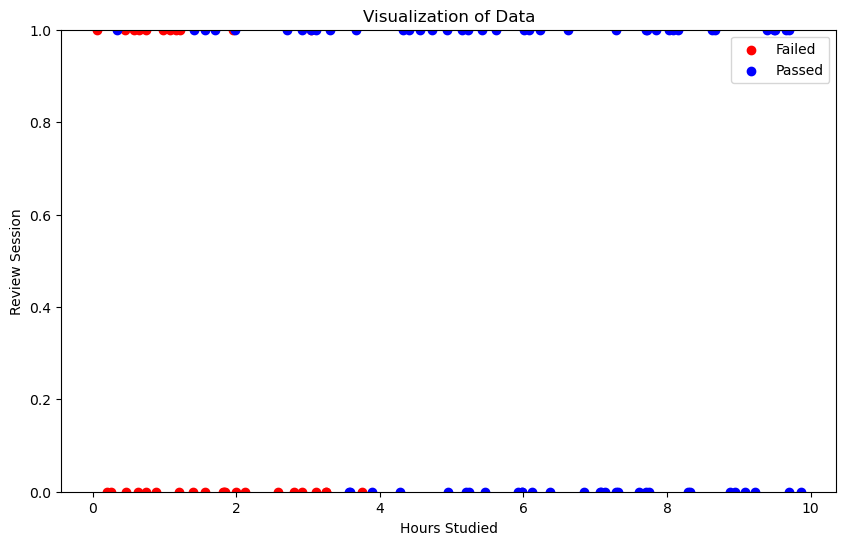

Model Coefficients:
[[1.36499215 1.87733756]]
Accuracy: 0.93
AUC: 0.93


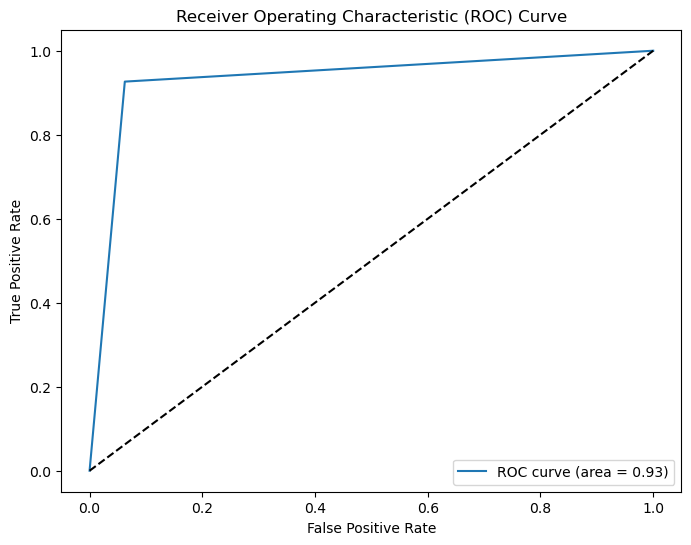

Confusion Matrix:
[[30  2]
 [ 5 63]]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

# Provided data
data = pd.read_csv('student_data.csv')
# Create a dataframe
df = pd.DataFrame(data)

# 1. Create a visualization of the data
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Results'] == 0]['Hours_Studied'], df[df['Results'] == 0]['Review_Session'], color='red', label='Failed')
plt.scatter(df[df['Results'] == 1]['Hours_Studied'], df[df['Results'] == 1]['Review_Session'], color='blue', label='Passed')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Visualization of Data')
plt.legend()

# Setting the y-axis limit to start from 1
plt.ylim(0, 1)

plt.show()


# 2. Fit a logistic regression model
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

# 3. Output model coefficients and performance metrics
print("Model Coefficients:")
print(log_reg_model.coef_)

y_pred = log_reg_model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

auc = roc_auc_score(y, y_pred)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


In [6]:
df

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1
...,...,...,...
95,4.937956,1,1
96,5.227328,1,1
97,4.275410,0,1
98,0.254191,0,0


C:\Users\cboye\AppData\Local\Temp\ipykernel_3200\1417728737.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0, 9))


<Figure size 1000x600 with 0 Axes>

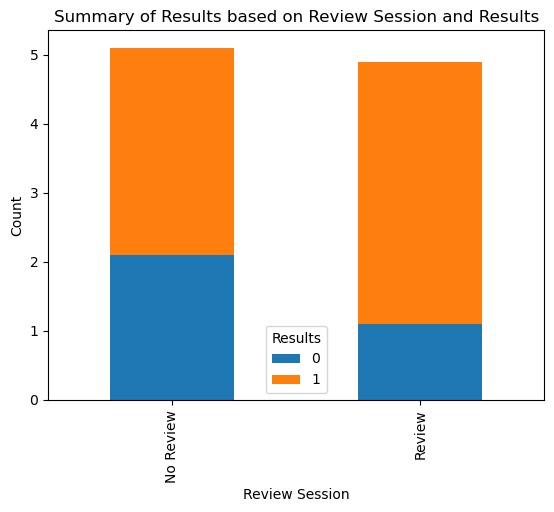

In [8]:
plt.figure(figsize=(10, 6))
ax = df.groupby(['Review_Session', 'Results']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Review Session')
plt.ylabel('Count')
plt.title('Summary of Results based on Review Session and Results')

# Modifying the labels
ax.set_xticklabels(['No Review', 'Review'])
ax.set_yticklabels(range(0, 9))

plt.show()

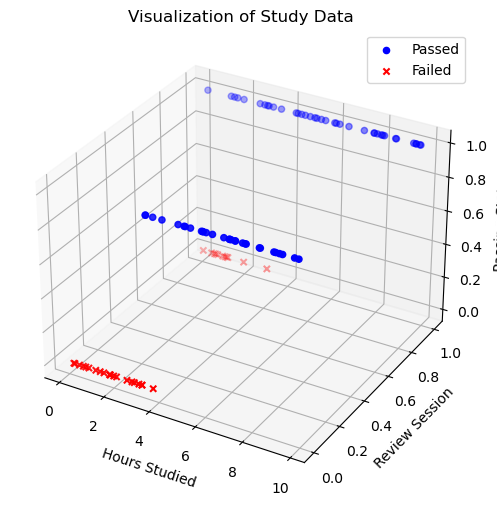

In [11]:

# Splitting the data based on results
passed = df[df['Results'] == 1]
failed = df[df['Results'] == 0]

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(passed['Hours_Studied'], passed['Review_Session'], np.ones(len(passed)), c='b', marker='o', label='Passed')
ax.scatter(failed['Hours_Studied'], failed['Review_Session'], np.zeros(len(failed)), c='r', marker='x', label='Failed')

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Review Session')
ax.set_zlabel('Passing Status')

plt.title('Visualization of Study Data')
plt.legend()
plt.show()